## CSE-221710305036-N.V.PRANAY RAJ

### Mobile Price Classification

### Problem Statement
- Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.
He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.
Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.
In this problem you do not have to predict actual price but a price range indicating how high the price is

### Loading Data

In [167]:
import pandas as pd
import numpy as np

In [168]:
dataset=pd.read_csv("train.csv")
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [169]:
dataset.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [170]:
dataset.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [171]:
dataset.isnull().sum()


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Analysing the Data or Data Analysis

In [172]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [173]:
dataset.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [174]:
dataset.price_range.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

### Data Visualization

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [176]:
dataset.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


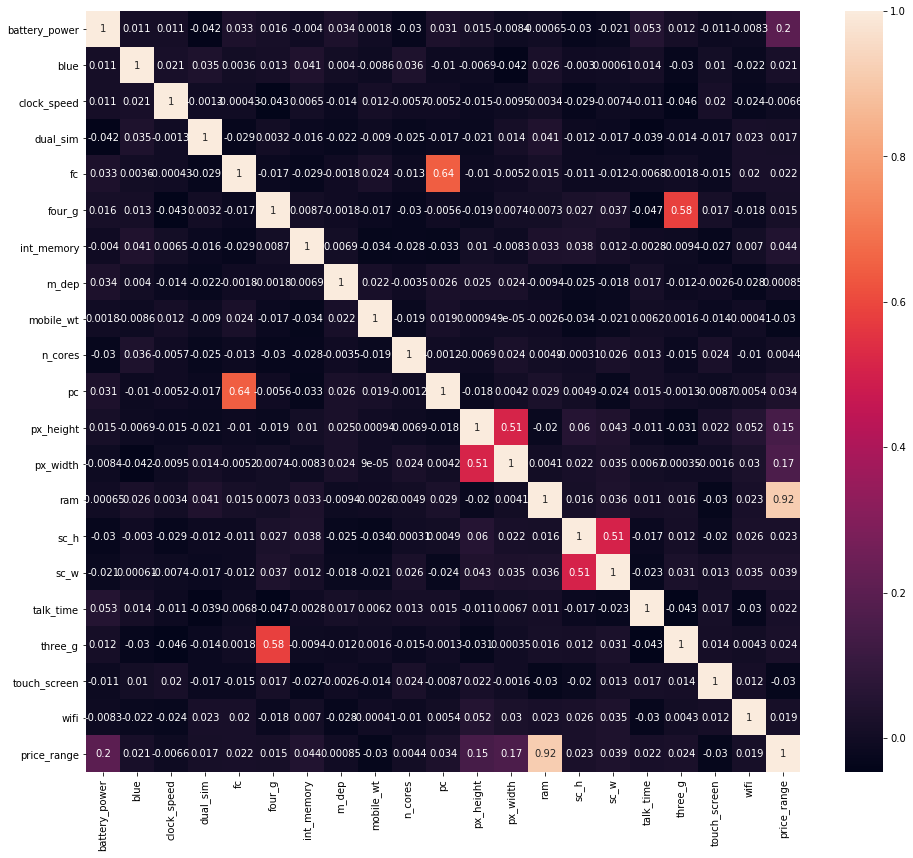

In [177]:
plt.figure(figsize=(16,14))
sns.heatmap(dataset.corr(),annot=True)

### Ram affected by price

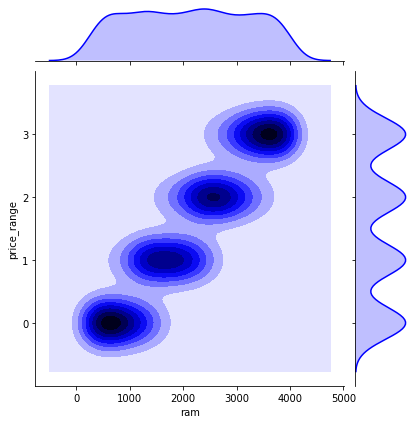

In [178]:
sns.jointplot(x='ram',y='price_range',data=dataset,color='blue',kind='kde');

- Observation: The above joint plot shows the relation between the features ram and price range.
 


### Internal memory vs Price Range

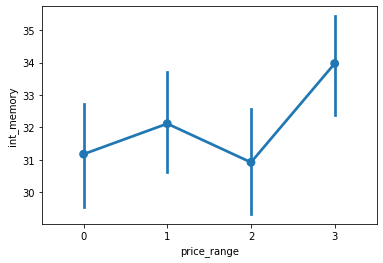

In [179]:
sns.pointplot(y="int_memory", x="price_range", data=dataset)

### Percentage of phones which support 3G

In [180]:
labels = ["3G-supported",'Not supported']
values=dataset['three_g'].value_counts().values
print(values)

[1523  477]


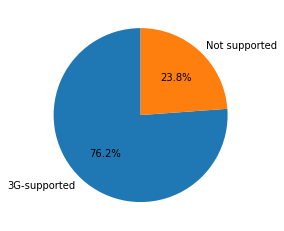

In [181]:
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',startangle=90)
plt.show()

Observation - Here by the above Py diagram we can infer that 76.2% of phones support 3G

### Percentage of phones which support 4G

In [182]:
labels4g = ["4G-supported",'Not supported']
values4g = dataset['four_g'].value_counts().values
print(values)

[1523  477]


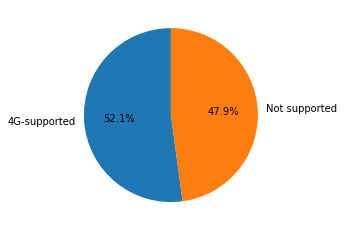

In [183]:
fig1, ax1 = plt.subplots()
ax1.pie(values4g, labels=labels4g, autopct='%1.1f%%',startangle=90)
plt.show()

Observation - By the above Py diagram we can infer that 52.1% of mobile phones support 4G

### Battery power vs Price Range

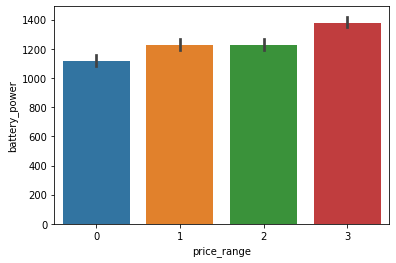

In [184]:
sns.barplot(x="price_range", y="battery_power", data=dataset)

Observation - By the above barplot we can infer the price ranges of the mobiles with respect to their battery feature

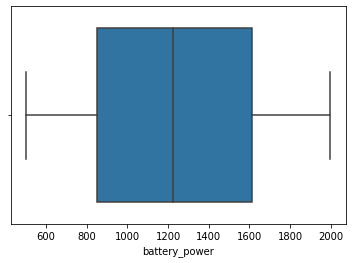

In [185]:
sns.boxplot(x=dataset['battery_power'])

Here we can infer that 50% of te mobile phones in dataset are having 1200 as battery power

### Number of phones vs camera megapixels of Front and Primary camera

Text(0.5, 0, 'MegaPixels')

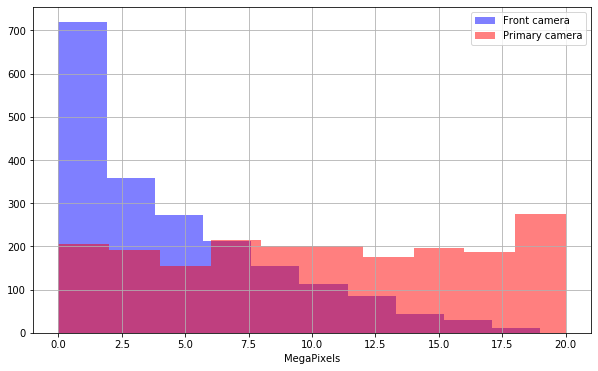

In [186]:
plt.figure(figsize=(10,6))
dataset['fc'].hist(alpha=0.5,color='blue',label='Front camera')
dataset['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

Observation - here in above visualization blue colour refers front cam ,peach colour refers to primary cam and 
dark pink refers to the mobiles having both primary and fron cam

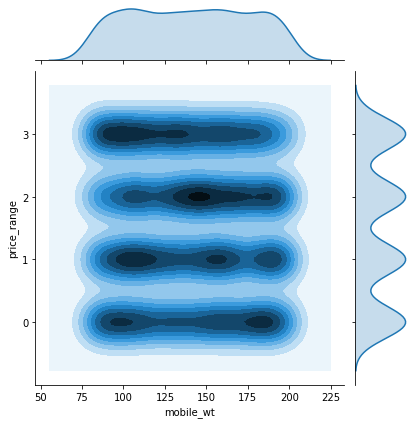

In [187]:
# mobile weight
sns.jointplot(x='mobile_wt',y='price_range',data=dataset,kind='kde')

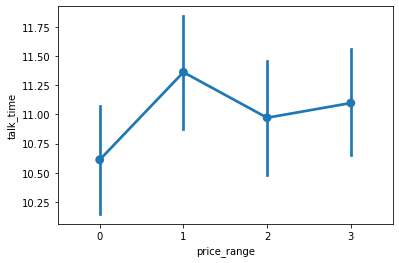

In [188]:
#talk time
sns.pointplot(x='price_range',y='talk_time',data=dataset)

- Here we can see the point plot between the features of output column price range in x axis and feature talktime on y axis

### Splitting of Data

In [189]:
# X (all the parameters except the one we are predicting)
# y (The predicting column)
X=dataset.drop('price_range',axis=1)
y=dataset['price_range']

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=101)

In [192]:
X_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
61,799,1,2.3,0,1,1,63,0.8,144,8,6,361,975,431,15,6,6,1,1,1
853,1195,1,1.1,1,2,1,8,0.9,80,6,6,327,1001,643,14,2,19,1,0,0
680,658,1,2.7,0,0,1,12,0.9,103,7,3,1156,1750,3587,14,11,20,1,0,0
455,1747,1,0.9,0,6,1,48,0.7,94,3,19,947,1131,2362,17,2,19,1,1,0
130,1414,0,2.0,1,2,0,54,0.8,99,7,3,262,829,3799,17,7,7,1,0,1


### Data Scaling

In [193]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_train=scaler.fit_transform(X_train)
scaled_X_train

array([[-1.01466685,  1.01807375,  0.97888136, ...,  0.57160535,
         0.98371468,  0.98813014],
       [-0.12026936,  1.01807375, -0.50718475, ...,  0.57160535,
        -1.01655492, -1.01201244],
       [-1.33312657,  1.01807375,  1.47423673, ...,  0.57160535,
        -1.01655492, -1.01201244],
       ...,
       [ 0.67926779,  1.01807375, -0.01182938, ...,  0.57160535,
        -1.01655492, -1.01201244],
       [ 0.81929972, -0.98224711, -1.2502178 , ...,  0.57160535,
        -1.01655492,  0.98813014],
       [ 0.39920393, -0.98224711, -0.38334591, ...,  0.57160535,
         0.98371468,  0.98813014]])

In [194]:
# scaling for train data we use fit_transform 
# cuz in fit when it comes to the train it finds mean and variance
# based on mean and variance it will apply it to the train data

scaled_X_train=pd.DataFrame(scaler.fit_transform(X_train),
                            columns=X_train.columns)
scaled_X_train

# scaling for test data and for test we should only use transform
# cuz in fit when it comes to the train it finds mean and variance
# based on mean and variance it will apply it to the train data

scaled_X_test=pd.DataFrame(scaler.transform(X_test),
                            columns=X_train.columns)
scaled_X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0.270465,-0.982247,-1.250218,-1.005988,1.300989,0.944804,0.536547,-1.073050,-1.387107,-1.531661,1.645862,0.581216,-0.771084,-0.478715,-0.076102,-1.333429,0.557081,0.571605,-1.016555,-1.012012
1,-1.443797,-0.982247,-1.250218,-1.005988,-0.310856,-1.058420,-0.350116,-0.726738,-1.330752,-0.220486,-0.991454,0.650448,1.607219,-0.226356,-0.312707,0.951183,0.557081,0.571605,0.983715,0.988130
2,-1.495744,-0.982247,-0.135668,0.994048,1.300989,0.944804,-1.347612,-0.034114,0.049941,1.527747,0.656869,-1.185328,-1.531305,0.973260,-0.785916,0.265799,-0.188848,0.571605,-1.016555,0.988130
3,-0.154148,1.018074,-0.383346,-1.005988,0.149671,0.944804,0.979878,1.697446,0.106296,-0.220486,1.645862,0.621415,-0.010864,-0.593922,-1.259125,-0.648045,1.675973,0.571605,0.983715,0.988130
4,-0.795585,-0.982247,-0.631024,0.994048,-0.310856,0.944804,-1.569278,-0.726738,-0.823559,-1.531661,-0.991454,1.635336,0.493624,-0.963316,-0.076102,0.951183,-1.307741,0.571605,0.983715,0.988130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,0.085261,1.018074,0.978881,-1.005988,1.300989,0.944804,-0.904280,-1.419362,-1.189865,-1.094603,1.316198,-1.404192,-1.382515,-1.544837,-0.549311,-0.191123,-1.307741,0.571605,0.983715,-1.012012
656,-1.665138,1.018074,1.845753,0.994048,0.149671,0.944804,0.093215,1.351134,-0.429075,1.527747,0.492037,-1.111629,0.065855,1.052808,0.397107,0.265799,0.557081,0.571605,-1.016555,-1.012012
657,-0.590054,1.018074,0.483526,-1.005988,-0.080592,0.944804,1.090711,-0.034114,-1.612526,-0.657544,-0.332125,-0.508637,-1.210478,0.588322,1.106921,1.408105,0.743563,0.571605,0.983715,-1.012012
658,-1.464124,1.018074,0.359687,-1.005988,1.070726,0.944804,-1.458445,1.004822,1.656054,-1.094603,0.821701,-0.359005,-0.522327,1.263106,1.106921,-0.419584,-0.748294,0.571605,0.983715,-1.012012


## Logistic Regression

In [195]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()

In [196]:
lm.fit(X_train,y_train)

/Users/pranaynethi/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [197]:
lm.score(X_train,y_train)

0.6447761194029851

In [198]:
lm.score(X_test,y_test)

0.6181818181818182

### Training Decision Tree Model

In [199]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [200]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [201]:
dtree.score(X_test,y_test)

0.8212121212121212

### Training KNN Model

In [202]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [203]:
knn.score(scaled_X_train,y_train)

0.6992537313432836

#Elbow Method For optimum value of K

In [204]:
error_rate = []
for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

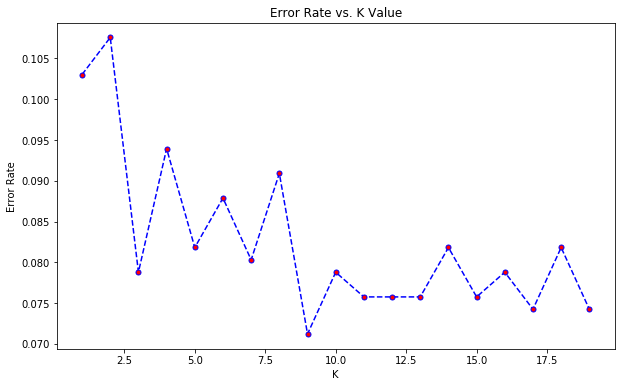

In [205]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Training Random Forest Model

In [206]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [207]:
rfc.score(X_train,y_train)

1.0

## Random Forest Model with Grid Search CV

In [208]:
from sklearn.model_selection import GridSearchCV

In [209]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=101)

In [210]:
param_grid = {
    'n_estimators':[200,500],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[4,5,6,7,8],
    'criterion':['gini','entropy']
}

In [211]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=101,
                                 

In [212]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [213]:
rfc1=RandomForestClassifier(random_state=101, max_features='auto', 
                            n_estimators=500, 
                            max_depth=8, criterion='entropy')

In [214]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [215]:
rfc1.score(X_train,y_train)

0.9985074626865672

## *Result - Random Forest model has performed the best

In [216]:
from sklearn.metrics import classification_report,confusion_matrix

In [227]:
pred = rfc1.predict(X_test)

In [228]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       158
           1       0.78      0.89      0.83       152
           2       0.93      0.75      0.83       199
           3       0.88      0.97      0.92       151

    accuracy                           0.88       660
   macro avg       0.88      0.89      0.88       660
weighted avg       0.89      0.88      0.88       660



In [229]:
matrix=confusion_matrix(y_test,pred)
print(matrix)

[[150   8   0   0]
 [  9 136   7   0]
 [  0  30 150  19]
 [  0   0   5 146]]


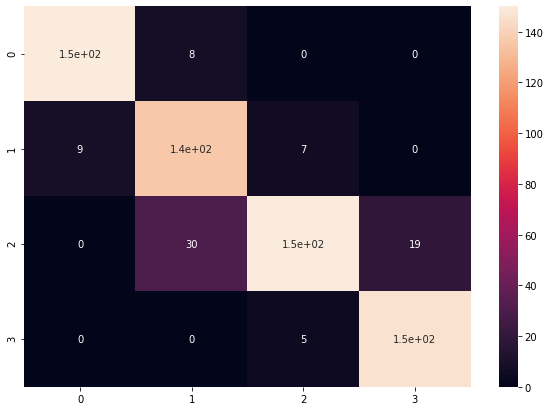

In [230]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix,annot=True)

### Price prediction of Test.csv Using Random Forest Model for Prediction

In [231]:
data_test=pd.read_csv('test.csv')
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [232]:
data_test=data_test.drop('id',axis=1)

In [233]:
data_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


Model

In [234]:
predicted_price=rfc1.predict(data_test)

Predicted Price Range

In [236]:
predicted_price

array([3, 3, 3, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 1, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 2, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 0, 0, 3, 1, 2, 1, 0, 3, 0, 3, 1, 3, 1, 1, 3, 3, 2, 0, 1, 1, 1,
       1, 3, 1, 1, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 2, 0, 2, 1, 0, 2, 1, 3, 1, 0, 0, 3, 1, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 1, 3, 0, 0, 3, 2, 1, 1, 0, 3, 3, 3, 1, 0, 2,
       1, 1, 3, 1, 1, 0, 3, 2, 1, 3, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 0, 0,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       2, 3, 1, 2, 3, 3, 3, 1, 2, 1, 0, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 0, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 0, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 0, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 1, 3, 1, 1, 3, 2, 0, 3, 0, 1, 2, 0, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 1, 0, 2, 3, 1,

In [238]:
data_test['price_range']=predicted_price
data_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,3
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,...,644,913,2121,14,8,15,1,1,0,1
996,609,0,1.8,1,0,0,13,0.9,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,...,38,832,2509,15,11,6,0,1,0,2
